In [1]:
import numpy as np

def sigmoid(x): 
    return 1. / (1. + np.exp(-x))

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index 
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)

        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)

        x[idx] = tmp_val
        it.iternext() # 다음 인덱스로 이동 

    return grad


# 1 hidden layer( 6 )

In [20]:
class LogicGate: 
    def __init__(self, gate_name, xdata, tdata): # xdata, tdata, W, b 초기화
        self.name = gate_name 
        self.xdata = xdata.reshape(4,2) # 입력 데이터 초기화
        self.tdata = tdata.reshape(4,1) # 정답 데이터 초기화

        # 입력층 노드 2 개, 은닉층 노드 6 개. 은닉층 개수는 적당한 값으로 정핚다.
        self.W2 = np.random.rand(2,6) 
        self.b2 = np.random.rand(6)
        # 은닉층 노드 6 개, 출력층 노드 1 개
        self.W3 = np.random.rand(6,1)
        self.b3 = np.random.rand(1)
        # 학습률 learning rate 초기화.
        self.learning_rate = 1e-2 

    def feed_forward(self): # 피드포워드 수행하며 손실함수 값 계산
        delta = 1e-7 # log 무핚대 발산 방지
        z2 = np.dot(self.xdata, self.W2) + self.b2 # 은닉층 선형회귀 값
        a2 = sigmoid(z2) # 은닉층 출력
        z3 = np.dot(a2, self.W3) + self.b3 # 출력층 선형회귀 값
        y = a3 = sigmoid(z3) # 출력층 출력
        return -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1 - y)+delta))

    def loss_val(self): # 손실함수 값 계산
        delta = 1e-7 # log 무핚대 발산 방지
        z2 = np.dot(self.xdata, self.W2) + self.b2 # 은닉층 선형회귀 값
        a2 = sigmoid(z2) # 은닉층 출력
        z3 = np.dot(a2, self.W3) + self.b3 # 출력층 선형회귀 값
        y = a3 = sigmoid(z3) # 출력층 출력
        return -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1 - y)+delta))

    def train(self ): # 경사하강법 이용하여 W, b 업데이트
        f = lambda x : self.feed_forward() 
        print("Initial loss value = ", self.loss_val())
        for step in range(10001): # 경사하강법을 이용해서 W2, W3 와 바이어스 b2, b3 를 업데이트
            self.W2 -= self.learning_rate * numerical_derivative(f, self.W2) 
            self.b2 -= self.learning_rate * numerical_derivative(f, self.b2) 
            self.W3 -= self.learning_rate * numerical_derivative(f, self.W3) 
            self.b3 -= self.learning_rate * numerical_derivative(f, self.b3) 
            if (step % 1000 == 0):
                print("step = ", step, "loss value = ", self.loss_val()) 

    def predict(self, input_data): # 미래 값 예측
        self.xdata = input_data
        z2 = np.dot(self.xdata, self.W2) + self.b2 # 은닉층 선형회귀 값
        a2 = sigmoid(z2) # 은닉층 출력
        z3 = np.dot(a2, self.W3) + self.b3 # 출력층 선형회귀 값
        y = a3 = sigmoid(z3) # 출력층 출력

        if y > 0.5:
            result = 1 
        else:
            result = 0 

        return y, result 


# 2 hidden layer ( 4, 3 )

In [66]:
class LogicGate: 
    def __init__(self, gate_name, xdata, tdata): # xdata, tdata, W, b 초기화
        self.name = gate_name 
        self.xdata = xdata.reshape(4,2) # 입력 데이터 초기화
        self.tdata = tdata.reshape(4,1) # 정답 데이터 초기화

        # 입력층 노드 2 개, 은닉층 노드 6 개. 은닉층 개수는 적당한 값으로 정핚다.
        self.W2 = np.random.rand(2,4) 
        self.b2 = np.random.rand(4)
        # 은닉층1 노드 4 개, 출력층 노드 1 개
        self.W3 = np.random.rand(4,3)
        self.b3 = np.random.rand(3)
        # 은닉층 노드 3 개, 출력층 노드 1 개
        self.W4 = np.random.rand(3,1)
        self.b4 = np.random.rand(1)
        # 학습률 learning rate 초기화.
        self.learning_rate = 1e-2 

    def feed_forward(self): # 피드포워드 수행하며 손실함수 값 계산
        delta = 1e-7 # log 무핚대 발산 방지
        z2 = np.dot(self.xdata, self.W2) + self.b2 # 은닉층 선형회귀 값
        a2 = sigmoid(z2) # 은닉층 출력
        
        z3 = np.dot(a2, self.W3) + self.b3 # 은닉층 선형회귀 값
        a3 = sigmoid(z3) # 은닉층 출력
        
        z4 = np.dot(a3, self.W4) + self.b4 # 출력층 선형회귀 값
        y = a4 = sigmoid(z4) # 출력층 출력
        
        return -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1 - y)+delta))

    def loss_val(self): # 손실함수 값 계산
        delta = 1e-7 # log 무핚대 발산 방지
        z2 = np.dot(self.xdata, self.W2) + self.b2 # 은닉층 선형회귀 값
        a2 = sigmoid(z2) # 은닉층 출력

        z3 = np.dot(a2, self.W3) + self.b3 # 은닉층 선형회귀 값
        a3 = sigmoid(z3) # 은닉층 출력

        z4 = np.dot(a3, self.W4) + self.b4 # 출력층 선형회귀 값
        y = a4 = sigmoid(z4) # 출력층 출력
        
        return -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1 - y)+delta))

    def train(self ): # 경사하강법 이용하여 W, b 업데이트
        f = lambda x : self.feed_forward() 
        print("Initial loss value = ", self.loss_val())
        for step in range(40001): # 경사하강법을 이용해서 W2, W3 와 바이어스 b2, b3 를 업데이트
            self.W2 -= self.learning_rate * numerical_derivative(f, self.W2) 
            self.b2 -= self.learning_rate * numerical_derivative(f, self.b2) 
            self.W3 -= self.learning_rate * numerical_derivative(f, self.W3) 
            self.b3 -= self.learning_rate * numerical_derivative(f, self.b3) 
            self.W4 -= self.learning_rate * numerical_derivative(f, self.W4) 
            self.b4 -= self.learning_rate * numerical_derivative(f, self.b4) 
            if (step % 1000 == 0):
                print("step = ", step, "loss value = ", self.loss_val()) 

    def predict(self, input_data): # 미래 값 예측
        self.xdata = input_data
        z2 = np.dot(self.xdata, self.W2) + self.b2 # 은닉층 선형회귀 값
        a2 = sigmoid(z2) # 은닉층 출력

        z3 = np.dot(a2, self.W3) + self.b3 # 은닉층 선형회귀 값
        a3 = sigmoid(z3) # 은닉층 출력
        
        z4 = np.dot(a3, self.W4) + self.b4 # 출력층 선형회귀 값
        y = a4 = sigmoid(z4) # 출력층 출력

        if y > 0.5:
            result = 1 
        else:
            result = 0 

        return y, result 


In [67]:
# XOR 논리 게이트 학습
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ]) # 입력 데이터 생성
tdata = np.array([0, 1, 1, 0])
xor_obj = LogicGate("XOR", xdata, tdata) # XOR 객체생성
xor_obj.train() 

# XOR 논리 게이트 검증
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for data in test_data:
    sigmoid_val, logical_val = xor_obj.predict(data) # 임의 데이터에 대해 결과 예측
    print(data, " = ", logical_val)


Initial loss value =  4.432652067229332
step =  0 loss value =  4.358529232140617
step =  1000 loss value =  2.77321153116539
step =  2000 loss value =  2.773022035627201
step =  3000 loss value =  2.772844601755283
step =  4000 loss value =  2.7726750437563585
step =  5000 loss value =  2.772509625003823
step =  6000 loss value =  2.772344864995805
step =  7000 loss value =  2.77217737381374
step =  8000 loss value =  2.7720036977181817
step =  9000 loss value =  2.771820161523719
step =  10000 loss value =  2.771622693143847
step =  11000 loss value =  2.771406613171667
step =  12000 loss value =  2.7711663670075772
step =  13000 loss value =  2.770895167594427
step =  14000 loss value =  2.770584500863434
step =  15000 loss value =  2.770223419091061
step =  16000 loss value =  2.769797501258387
step =  17000 loss value =  2.76928727841619
step =  18000 loss value =  2.7686657748254953
step =  19000 loss value =  2.767894538177505
step =  20000 loss value =  2.766916986621544
step =

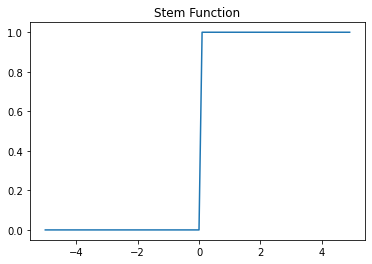

In [63]:
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.title('Stem Function')
plt.plot(x, y)
plt.show()